# K-Nearest Neighbors and Bias–Variance Tradeoff

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skl_ds

plt.style.use('seaborn')

I Create a synthetic dataset (with both features and targets) with [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) module and scatterplot this random samples with each class in a different color .


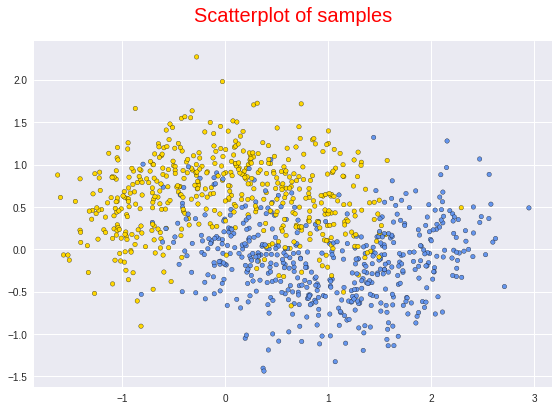

In [5]:
train_features,train_targets = skl_ds.make_moons(n_samples=1000,noise=0.35)

fig = plt.figure(figsize=(9,6))
cmap_sample = ListedColormap(['gold', 'cornflowerblue'])
fig.suptitle('Scatterplot of samples', fontsize=20,color='red')

ax=fig.add_axes([0.1,0.1,0.8,0.8])
ax.scatter(train_features[:,0],train_features[:,1],c=train_targets, edgecolor='k',s=20 ,cmap=cmap_sample);

I want to create 3 different data subsets by selecting 150 of the 1000 data points at random. Then for each of these 150-sample datasets, fit three [k-Nearest Neighbor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) classifier with: 𝑘 ∈ {4, 25, 50}. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

Then for each combination of dataset trained classifier, in a 3-by-3 grid,I plot the decision boundary . Each column represent a different value of 𝑘 and each row represent a different dataset.

# What is kNN ?
k-Nearest Neighbors algorithm (k-NN) is a non-parametric , lazy learning method used for classification and regression .This algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems .

k-Nearest Neighbors (kNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set.

More details are available in [wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)


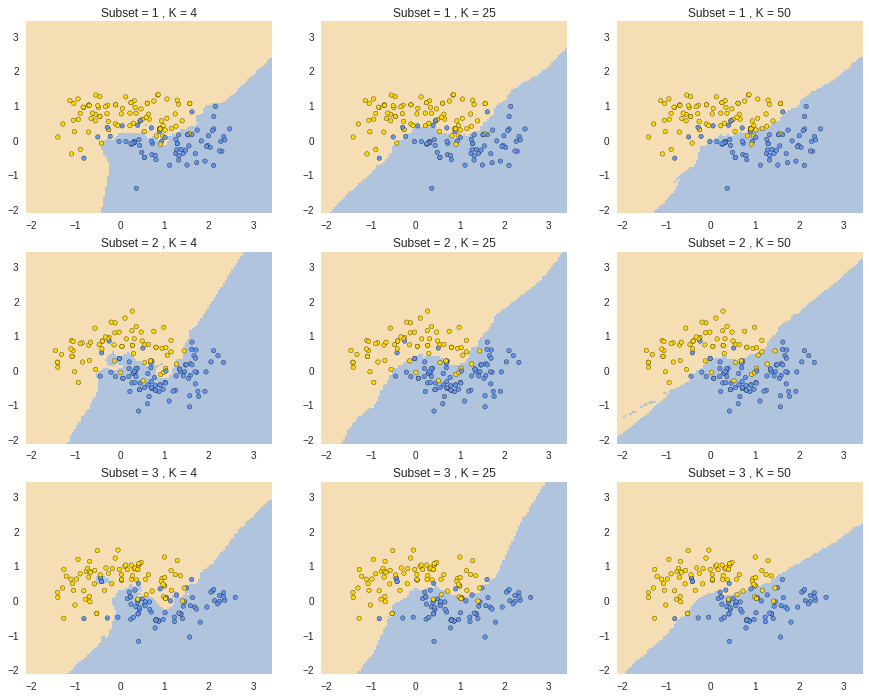

In [6]:
K_neighbors=[4,25,50]
fig = plt.figure(figsize=(15,12))
neigh = KNeighborsClassifier()

for i in range(0,3):
    
    index=np.random.choice(train_features.shape[0],150) 
    random_features=train_features[index]
    random_targets=train_targets[index]

    for K in K_neighbors:
        
        neigh.n_neighbors=K
        neigh.fit(random_features,random_targets)

        step_size = 0.05
        x_min, x_max = train_features[:, 0].min()-0.5 , train_features[:, 0].max()+0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),np.arange(x_min, x_max, step_size))

        Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        cmap_KNN = ListedColormap(['wheat', 'lightsteelblue'])
        
        ax = fig.add_subplot(3,3, 3*i + K_neighbors.index(K)+1)
        ax.pcolormesh(xx, yy, Z, cmap=cmap_KNN,shading='auto')
        ax.scatter(random_features[:, 0], random_features[:, 1], c=random_targets, cmap=cmap_sample, edgecolor='k', s=20)
        ax.set_title(f"Subset = {i+1} , K = {K}",size=12);

As you can see in the figure above , the value of 'k' can affect our model .

k = 4 ---> very complex model. very wiggly. specifically jagged .

k = 50 ---> very inflexible model. very smooth .

It seems that the model with k = 25 is a better model and predicts well on unseen data .

### For any given training set, the best choice for K would be the one striking the optimal trade-off between bias and variance

## How can we find the optimum K in K-Nearest Neighbor?
First of all , I want to explain a concept in machine learning, bias-variance tradeoff.

Assume the true model is 𝑌 = 𝑓 (𝑥) + 𝜀 and 𝜀 is irreducible error .
and assume 𝑓^(𝑥) is a fitted model when we use training data set .

#### what is bias? 
Difference between actual 𝑓(𝑥) and mean of 𝑓^(𝑥) resulted from different training set.

• Lower flexibility --> higher bias term

In other words, model with high bias pays very little attention to the training data and oversimplifies the model.

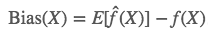

#### what is variance?
The variance is an error from sensitivity to small fluctuations in the training set. variance is the amount by which 𝑓^(𝑥) changes if we use different training set:

• More flexibility --> higher variance term 

In other words, model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before.

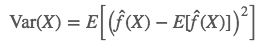


---


Now we can compute the MSE(mean square error) of training set :

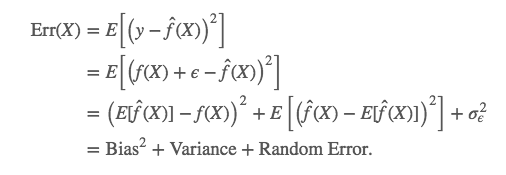


Imagine that the center of the target (red part) is the correct values of the data. As we move away from that region, the error becomes larger and larger. In this case, we get higher bias. Now imagine we get a number of separate predictions, which may be based on the variability in the training data. In this case, we get a higher variance.

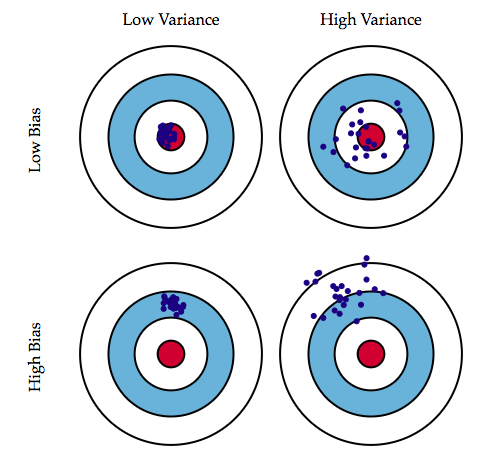

There are other two terms related to bias and variance, underfitting and overfitting. Underfitting means the model does not fit, in other words, does not predict the (training) data very well. On the other hand, overfitting means that the model predict the (training) data too well. It is too good to be true. If the new data point comes in, the prediction may be wrong. Normally, underfitting implies high bias and low variance, and overfitting implies low bias but high variance.

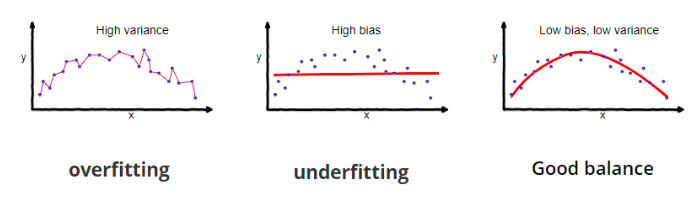

# KNN and Bias-Variance tradeoff
Let’s go back to KNN, how do the bias and variance relate to KNN? 

The bias will be 0 when K=1, however, when it comes to new data (in test set), it has higher chance to be an error, which causes high variance. When we increase K, the training error will increase (increase bias), but the test error may decrease at the same time (decrease variance). We can think that when K becomes larger, since it has to consider more neighbors, its model is more complex. 

##  which “k” leads to the best model?
I use make_moons with same parameters of previous part to create a new set of 500 random samples. Consider this as the test test while the 1000 samples of previous part is train dataset

I use train dataset to train a kNN classifier for 𝑘 = 1, 2, … , 500. For each “k” we compute the test and train error.



Optimal value of K : 21


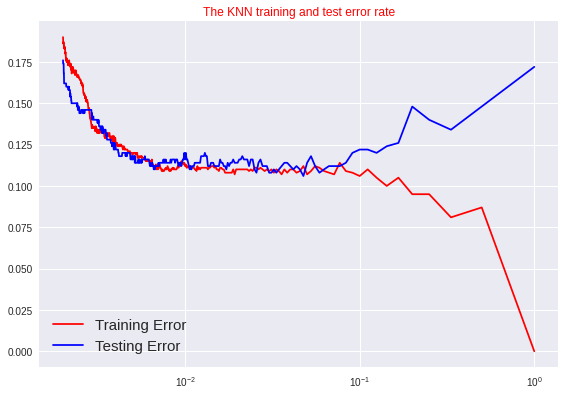

In [7]:
test_Features,test_targets=skl_ds.make_moons(n_samples=500,noise=0.35)
K_neighbors = np.arange(1,501)
train_errors = []
test_errors = []

for K in K_neighbors :
    
    neigh.n_neighbors=K
    neigh.fit(train_features,train_targets)
    
    train_score=neigh.score(train_features,train_targets)
    test_score=neigh.score(test_Features,test_targets)
    
    train_errors.append(1-train_score)
    test_errors.append(1-test_score)

print(f"Optimal value of K : {test_errors.index(min(test_errors))+1}")

fig =plt.figure(figsize=(9,6))
ax=fig.add_axes([0.1,0.1,0.8,0.8],xscale='log')

ax.plot(1/K_neighbors,train_errors, color='red',label='Training Error')
ax.plot(1/K_neighbors,test_errors, color='blue',label='Testing Error')
ax.legend(fontsize =15)
ax.set_title("The KNN training and test error rate",color='red');

Training error keep going down as “k” decreases (as flexibility increases).

Test error at first decreases but then starts to increase again.